In [4]:
#importing libraries
import numpy as np
import pandas as pd
import yfinance as yf
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report

yf.pdr_override() #use yahoo finance dataset
dataset = yf

oct = yf.download('COST', '2013-1-1', '2023-11-1') # downloads Costco stock price from January 2013 to October of this year

octdf = pd.DataFrame(oct) #creates dataframe to hold the data for october
octdf.head() #displays first five columns of the dataframe

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,100.599998,101.449997,100.209999,101.449997,82.717522,3153800
2013-01-03,102.110001,103.019997,101.760002,102.489998,83.565514,3872400
2013-01-04,102.550003,102.910004,101.550003,102.160004,83.296432,1989000
2013-01-07,101.089996,101.730003,100.900002,101.370003,82.652306,1663900
2013-01-08,101.000000,101.790001,100.730003,101.180000,82.497406,2189900


In [5]:
percentile75 = octdf.Close.quantile(0.75) # Get the 75% percentile of the closing price
percentile25 = octdf.Close.quantile(0.25) # Get the 25% percentile of the closing price

#equation for added feature is (daily close price - percentile25)/(percentile75 - percentile 25)
#create empty lists
dailyValueProportion = [] # dailyValueProportion equals (daily close price - percentile25)/(percentile75 - percentile 25)
highlowDifference = [] # highlowDifference equals daily highPrice - lowPrice
opencloseDifference = [] # opencloseDifference equals daily openPrice - closePrice

for i in range (0, len(octdf) ): #loop that takes in all the rows of closing values and calculates the Daily Value Proportion feature from them
  dailyClosePrice = octdf.iloc[i].Close
  calculation = (dailyClosePrice - percentile25)/(percentile75 - percentile25) #
  dailyValueProportion.append(calculation) # add dailyValueProportion to its empty list

for i in range (0, len(octdf) ): #obtains the high - low daily price
  highPrice = octdf.iloc[i].High
  lowPrice = octdf.iloc[i].Low
  calculation = (highPrice - lowPrice)
  highlowDifference.append(calculation)# add highlowDifference to its empty list

for i in range (0, len(octdf) ): #obtains the close - open daily price
  openPrice = octdf.iloc[i].Close
  closePrice = octdf.iloc[i].Open
  calculation = (openPrice - closePrice)
  opencloseDifference.append(calculation)# add opencloseDifference to its empty list

octdf['Daily_Value_Proportion'] = dailyValueProportion #adds the Daily Value Proportion to the dataframe as a feature
octdf['HLdifference'] = highlowDifference #adds the difference between the highest and lowest price for the day as a feature to our feature set
octdf['OCdifference'] = opencloseDifference #adds the difference between the opening and closing price for the day as a feature to our feature set
# now we get 3 new columns(features)
print(octdf)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-01-02  100.599998  101.449997  100.209999  101.449997   82.717522   
2013-01-03  102.110001  103.019997  101.760002  102.489998   83.565514   
2013-01-04  102.550003  102.910004  101.550003  102.160004   83.296432   
2013-01-07  101.089996  101.730003  100.900002  101.370003   82.652306   
2013-01-08  101.000000  101.790001  100.730003  101.180000   82.497406   
...                ...         ...         ...         ...         ...   
2023-10-25  548.549988  553.830017  545.609985  549.989990  548.982483   
2023-10-26  549.650024  554.659973  545.530029  547.599976  546.596863   
2023-10-27  547.599976  548.030029  540.229980  543.030029  542.035278   
2023-10-30  545.739990  556.359985  543.640015  554.880005  553.863525   
2023-10-31  552.159973  554.030029  549.059998  552.440002  551.427979   

             Volume  Daily_Value_Prop

In [6]:
#perform data normalization by calculating Z scores
zOpen = []
zHigh = []
zLow = []
zClose = []
zDaily_Value_Proportion = []
zHLdifference = []
zOCdifference = []

 #obtains Z score for Open
meanValue = octdf.Open.mean()
sdev = octdf.Open.std()
print("The mean value and standard deviation for Open price is: ")
print(meanValue)
print(sdev)

for i in range (0, len(octdf) ):
  b = octdf.iloc[i].Open
  z = (b - meanValue)/sdev
  zOpen.append(z)

#obtains Z score for High
meanValue = octdf.High.mean()
sdev = octdf.High.std()
print("The mean value and standard deviation for High price is: ")
print(meanValue)
print(sdev)

for i in range (0, len(octdf) ):
  z = (octdf.iloc[i].High - meanValue)/sdev
  zHigh.append(z)

#obtains Z score for Low
meanValue = octdf.Low.mean()
sdev = octdf.Low.std()
print("The mean value and standard deviation for Low price is: ")
print(meanValue)
print(sdev)

for i in range (0, len(octdf) ):
  z = (octdf.iloc[i].Low - meanValue)/sdev
  zLow.append(z)

#obtains Z score for Daily_Value_Proportion
meanValue = octdf.Daily_Value_Proportion.mean()
sdev = octdf.Daily_Value_Proportion.std()
print("The mean value and standard deviation for Daily Value Proportion is: ")
print(meanValue)
print(sdev)

for i in range (0, len(octdf) ):
  z = (octdf.iloc[i].Daily_Value_Proportion - meanValue)/sdev
  zDaily_Value_Proportion.append(z)


#obtains Z score for H-L
meanValue = octdf.HLdifference.mean()
sdev = octdf.HLdifference.std()
print("The mean value and standard deviation for High Low difference is: ")
print(meanValue)
print(sdev)



for i in range (0, len(octdf) ):
  z = (octdf.iloc[i].HLdifference - meanValue)/sdev
  zHLdifference.append(z)

#obtains Z score for O-C
meanValue = octdf.OCdifference.mean()
sdev = octdf.OCdifference.std()
print("The mean value and standard deviation for Open Close difference is: ")
print(meanValue)
print(sdev)

for i in range (0, len(octdf) ):
  z = (octdf.iloc[i].OCdifference - meanValue)/sdev
  zOCdifference.append(z)

octdf['zOpen'] = zOpen #adds z score of Open to the dataframe as a feature
octdf['zHigh'] = zHigh #adds z score of Close to the dataframe as a feature
octdf['zLow'] = zLow #adds z score of Low to the dataframe as a feature
octdf['zDaily_Value_Proportion'] = zDaily_Value_Proportion #adds z score of Daily_Value_Proportion to the dataframe as a feature
octdf['zHLdifference'] = zHLdifference #adds z score of HLdifference to the dataframe as a feature
octdf['zOCdifference'] = zOCdifference #adds z score of OCdifference to the dataframe as a feature

newdf = octdf.drop(columns = ['Adj Close', 'Volume', 'Open', 'High', 'Low', 'Daily_Value_Proportion', 'HLdifference', 'OCdifference'],  axis = 1)

print(newdf)

The mean value and standard deviation for Open price is: 
264.5646423854625
147.17871955176315
The mean value and standard deviation for High price is: 
266.84238706056476
148.765396146933
The mean value and standard deviation for Low price is: 
262.3023359566588
145.61875185450583
The mean value and standard deviation for Daily Value Proportion is: 
0.5247107836230662
0.6601389092408222
The mean value and standard deviation for High Low difference is: 
4.540051103905964
4.28998900349674
The mean value and standard deviation for Open Close difference is: 
0.12283469278120845
3.7496225390212667
                 Close     zOpen     zHigh      zLow  zDaily_Value_Proportion  \
Date                                                                            
2013-01-02  101.449997 -1.114051 -1.111767 -1.113128                -1.108470   
2013-01-03  102.489998 -1.103792 -1.101213 -1.102484                -1.101408   
2013-01-04  102.160004 -1.100802 -1.101952 -1.103926                -1.1036

R^2 score: 0.9999488884550308


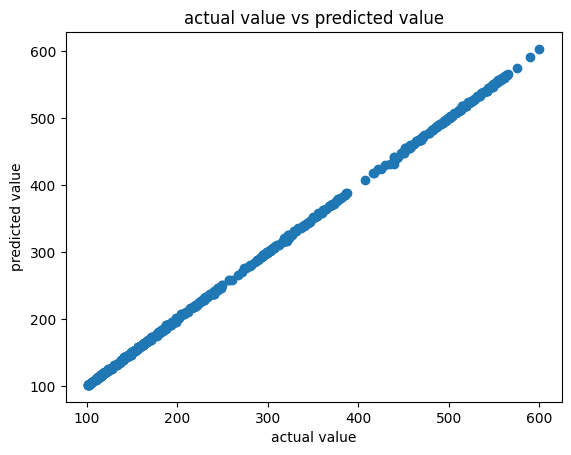

In [7]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
newdf = octdf.drop(columns=['Adj Close', 'Volume'])

X = newdf.drop('Close', axis=1)
y = newdf['Close']

# split into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# create Gradient Boosting Regressor model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# make predictions
predictions = model.predict(X_test)

# get r2 score
r2 = r2_score(y_test, predictions)

print(f"R^2 score: {r2}")

# Plot a scatter plot of actual values versus predicted values
plt.scatter(y_test, predictions)
plt.xlabel("actual value")
plt.ylabel("predicted value")
plt.title("actual value vs predicted value")
plt.show()